Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% CompleteDetected Plate: ['29432185']
Detected Plate: [75h 33105



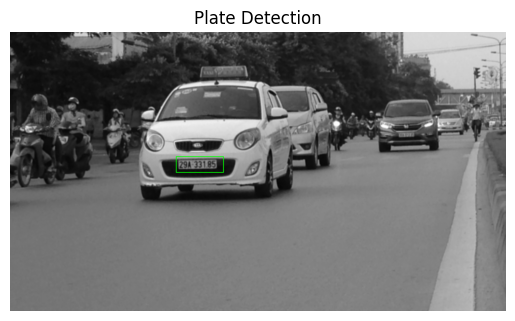

In [ ]:
import cv2
import matplotlib.pyplot as plt
import pytesseract
import easyocr

reader = easyocr.Reader(['en'])  # Load English model
text = reader.readtext(gray, detail=0)
print("Detected Plate:", text)


# Load image
img = cv2.imread("/content/car 4.jpg")

if img is None:
    print("Error: Image not found. Upload the file correctly!")
else:
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Load Haar cascade for number plate detection
    plate_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_russian_plate_number.xml")
    plates = plate_cascade.detectMultiScale(gray, 1.1, 4)

    # Draw bounding box around detected plates
    for (x, y, w, h) in plates:
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = gray[y:y+h, x:x+w]  # Extract plate region
        text = pytesseract.image_to_string(roi, config='--psm 8')
        print("Detected Plate:", text)

    # Use matplotlib instead of cv2.imshow()
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Plate Detection")
    plt.show()



